In [1]:
from keras import layers
from keras import models

/usr/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer= optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_dir= '/home/geist/Desktop/projects/kaggle/cats_dogs/cats_and_dogs_small/train'
validation_dir= '/home/geist/Desktop/projects/kaggle/cats_dogs/cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

('data batch shape:', (20, 150, 150, 3))
('labels batch shape:', (20,))


In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6892 - acc: 0.5295 - val_loss: 0.6712 - val_acc: 0.5840
Epoch 2/30
100/100 [==============================] - 4s 37ms/step - loss: 0.6531 - acc: 0.6280 - val_loss: 0.6391 - val_acc: 0.6270
Epoch 3/30
100/100 [==============================] - 4s 37ms/step - loss: 0.6058 - acc: 0.6780 - val_loss: 0.6302 - val_acc: 0.6270
Epoch 4/30
100/100 [==============================] - 4s 38ms/step - loss: 0.5591 - acc: 0.7095 - val_loss: 0.6632 - val_acc: 0.6450
Epoch 5/30
100/100 [==============================] - 4s 38ms/step - loss: 0.5428 - acc: 0.7140 - val_loss: 0.5817 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 4s 37ms/step - loss: 0.5125 - acc: 0.7345 - val_loss: 0.5898 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 4s 38ms/step - loss: 0.4910 - acc: 0.7515 - val_loss: 0.6136 - val_acc: 0.6600
Epoch 8/30
100/100 [==============================] - 4s 38ms/step - 

In [10]:
model.save('cats_and_dogs_small_1.h5')

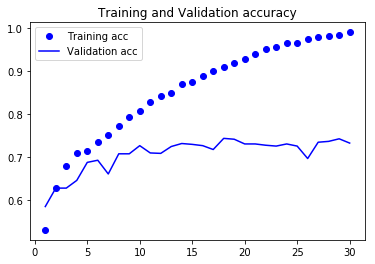

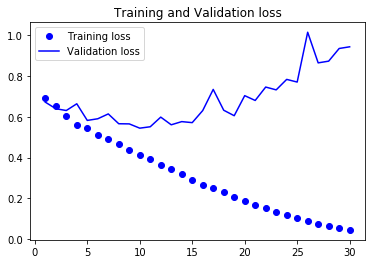

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(acc) +1 )

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [13]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode= 'nearest')

In [14]:
from keras.preprocessing import image

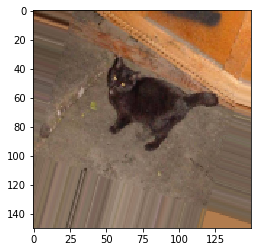

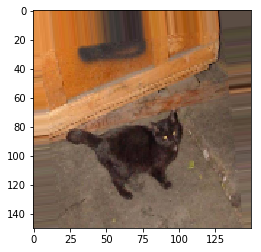

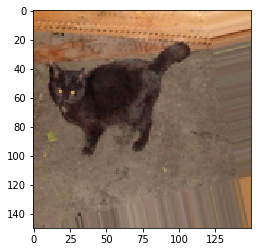

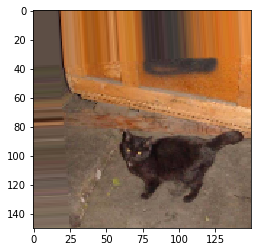

In [17]:
import os

train_cats_dir = '/home/geist/Desktop/projects/kaggle/cats_dogs/cats_and_dogs_small/train/cats'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[4]

img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 ==0:
        break
        
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 16s 157ms/step - loss: 0.6933 - acc: 0.5047 - val_loss: 0.6849 - val_acc: 0.5080
Epoch 2/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6779 - acc: 0.5712 - val_loss: 0.6592 - val_acc: 0.5990
Epoch 3/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6681 - acc: 0.5825 - val_loss: 0.6497 - val_acc: 0.6030
Epoch 4/100
100/100 [==============================] - 15s 149ms/step - loss: 0.6421 - acc: 0.6259 - val_loss: 0.6205 - val_acc: 0.6440
Epoch 5/100
100/100 [==============================] - 15s 147ms/step - loss: 0.6316 - acc: 0.6338 - val_loss: 0.6204 - val_acc: 0.6330
Epoch 6/100
100/100 [==============================] - 15s 151ms/step - loss: 0.6177 - acc: 0.6641 - val_loss: 0.5915 - val_acc: 0.6920
Epoch 7/100
100/100 [==============================] - 15s 148ms/step - loss: 0.5950 - acc: 0.6794 -

100/100 [==============================] - 15s 148ms/step - loss: 0.4092 - acc: 0.8147 - val_loss: 0.4286 - val_acc: 0.8110
Epoch 61/100
100/100 [==============================] - 15s 147ms/step - loss: 0.4011 - acc: 0.8238 - val_loss: 0.4257 - val_acc: 0.8250
Epoch 62/100
100/100 [==============================] - 16s 164ms/step - loss: 0.4027 - acc: 0.8122 - val_loss: 0.4113 - val_acc: 0.8120
Epoch 63/100
100/100 [==============================] - 15s 147ms/step - loss: 0.4103 - acc: 0.8112 - val_loss: 0.4120 - val_acc: 0.8200
Epoch 64/100
100/100 [==============================] - 15s 149ms/step - loss: 0.4122 - acc: 0.8119 - val_loss: 0.4572 - val_acc: 0.8020
Epoch 65/100
100/100 [==============================] - 15s 149ms/step - loss: 0.3832 - acc: 0.8306 - val_loss: 0.5350 - val_acc: 0.7450
Epoch 66/100
100/100 [==============================] - 15s 150ms/step - loss: 0.4010 - acc: 0.8212 - val_loss: 0.4179 - val_acc: 0.8160
Epoch 67/100
100/100 [==============================] 

In [20]:
model.save('cats_and_dogs_small_2.h5')

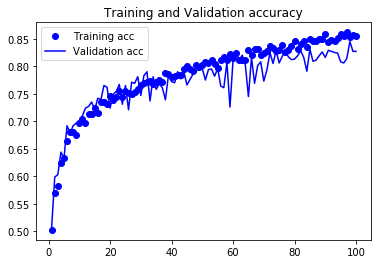

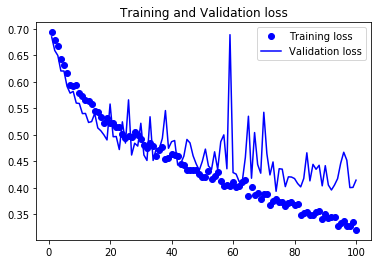

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(acc) +1 )

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()